In [1]:
#!/usr/bin/env python3
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass

### Get Tobias data

In [2]:
b2tf_effs = np.genfromtxt('./JZ_numerics/b2tf_effs.csv',delimiter=',',names=True)
b2tf_data_df = pd.DataFrame(b2tf_effs,columns=b2tf_effs.dtype.names)
b2tf_data_df['dm'] = b2tf_data_df['m1']-b2tf_data_df['m0']

### Get B2TF recast data

In [3]:
b2tf_effs_R = np.genfromtxt('./b2tf_trigger_effs.csv',delimiter=',',names=True)
b2tf_data_df_R = pd.DataFrame(b2tf_effs_R,columns=b2tf_effs_R.dtype.names)
b2tf_data_df_R['dm'] = b2tf_data_df_R['m1']-b2tf_data_df_R['m0']

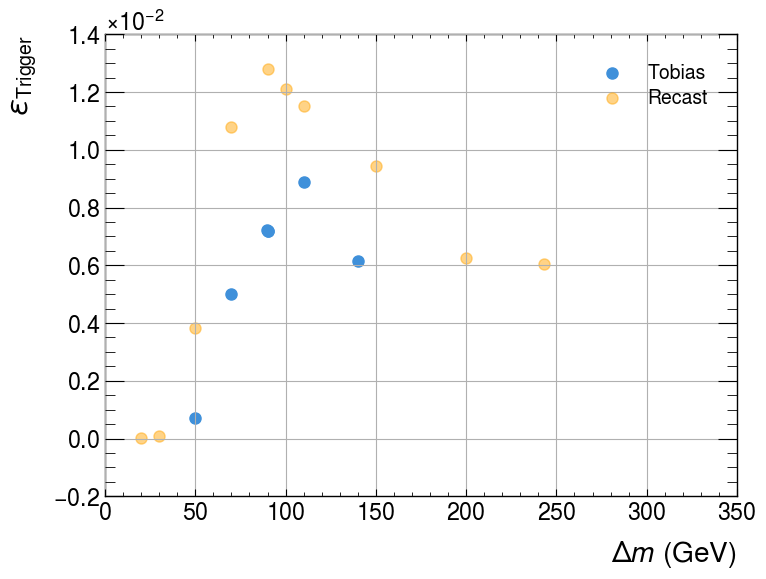

In [9]:
# plt.errorbar(data_recast['ctaum'],data_recast['effTrigger'],yerr=data_recast['effErr'],
#               fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)


ms = 500.0
ctau = 4.0
# Filter data
b2tf_data_df_filter = b2tf_data_df[(b2tf_data_df['ms'] == ms) & (np.abs(b2tf_data_df['ctau']-ctau) < 0.1)]
b2tf_data_df_filter = b2tf_data_df_filter.sort_values('dm')

b2tf_data_df_filter_R = b2tf_data_df_R[(b2tf_data_df_R['ms'] == ms) & (np.abs(b2tf_data_df_R['ctau']-ctau) < 0.1)]
b2tf_data_df_filter_R = b2tf_data_df_filter_R.sort_values('dm')


# plt.errorbar(b2tf_data_df_filter['dm'],b2tf_data_df_filter['eff'],
#          yerr=b2tf_data_df_filter['triggererr'],
          #     fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)
plt.scatter(b2tf_data_df_filter['dm'],b2tf_data_df_filter['eff'],label='Tobias')
plt.scatter(b2tf_data_df_filter_R['dm'],b2tf_data_df_filter_R['eff'],label='Recast',alpha=0.5)
plt.xlabel(r'$\Delta m$ (GeV)')
plt.ylabel(r'$\epsilon_{\rm Trigger}$')
plt.xlim(0,350.)
# plt.ylim(0.,25e-3)
# plt.yticks(np.arange(0.,25e-3,2e-3))
# plt.xticks(np.arange(0.,20.,2.))
plt.grid()
# plt.title(r'$m_S$ = %1.0f GeV, $m_1 = $ %1.2f GeV, $m_0 = $ %1.2f GeV, $\Delta m_{10} = $ %1.1f, $\beta^* = $ %1.1f' %(mS,m1,m0,dm,beta),
          # fontsize=10)
plt.legend()
plt.show()

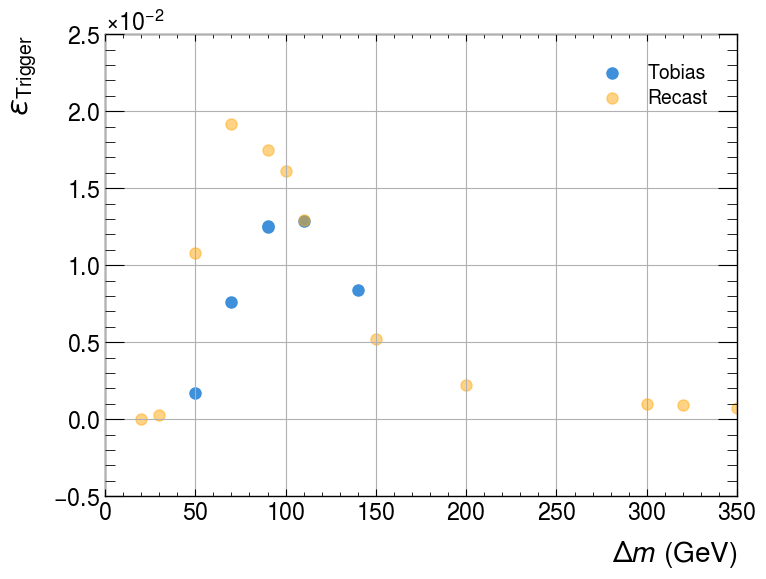

In [10]:
# plt.errorbar(data_recast['ctaum'],data_recast['effTrigger'],yerr=data_recast['effErr'],
#               fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)


ms = 2000.0
ctau = 4.0
# Filter data
b2tf_data_df_filter = b2tf_data_df[(b2tf_data_df['ms'] == ms) & (np.abs(b2tf_data_df['ctau']-ctau) < 0.1)]
b2tf_data_df_filter = b2tf_data_df_filter.sort_values('dm')

b2tf_data_df_filter_R = b2tf_data_df_R[(b2tf_data_df_R['ms'] == ms) & (np.abs(b2tf_data_df_R['ctau']-ctau) < 0.1)]
b2tf_data_df_filter_R = b2tf_data_df_filter_R.sort_values('dm')


# plt.errorbar(b2tf_data_df_filter['dm'],b2tf_data_df_filter['eff'],
#          yerr=b2tf_data_df_filter['triggererr'],
          #     fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)
plt.scatter(b2tf_data_df_filter['dm'],b2tf_data_df_filter['eff'],label='Tobias')
plt.scatter(b2tf_data_df_filter_R['dm'],b2tf_data_df_filter_R['eff'],label='Recast',alpha=0.5)
plt.xlabel(r'$\Delta m$ (GeV)')
plt.ylabel(r'$\epsilon_{\rm Trigger}$')
plt.xlim(0,350.)
# plt.ylim(0.,25e-3)
# plt.yticks(np.arange(0.,25e-3,2e-3))
# plt.xticks(np.arange(0.,20.,2.))
plt.grid()
# plt.title(r'$m_S$ = %1.0f GeV, $m_1 = $ %1.2f GeV, $m_0 = $ %1.2f GeV, $\Delta m_{10} = $ %1.1f, $\beta^* = $ %1.1f' %(mS,m1,m0,dm,beta),
          # fontsize=10)
plt.legend()
plt.show()